<a href="https://colab.research.google.com/github/IndeewaAmarasinghe/RP-2024-25J-125-Crop-yield-prediction---Paddy-harvest-/blob/IT21227868-Rice-Variety-Recommendation/Rice_Variety_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')

# Load the datasets
varieties_file_path = '/content/drive/MyDrive/Rice Genie/RiceVarietiesData.xlsx'
district_file_path = '/content/drive/MyDrive/Rice Genie/SriLankaDistricts.csv'

varieties_data = pd.read_excel(varieties_file_path, sheet_name='Sheet1')
district_data = pd.read_csv(district_file_path)

#combined_data = pd.merge(varieties_data, district_data, how='cross')
combined_data = pd.merge(varieties_data, district_data, how='inner', on='Recommendation')


# Save the processed data to a CSV file
combined_data.to_csv('/content/sample_data/merged_data.csv', index=False)

# Download the CSV file
files.download('/content/sample_data/merged_data.csv')

def convert_maturity_to_numeric(value):
    if isinstance(value, str) and '-' in value:
        parts = value.split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    try:
        return float(value)
    except ValueError:
        return np.nan

# Convert 'Maturity (days)' to numeric averages
combined_data['Maturity (days)'] = combined_data['Maturity (days)'].apply(convert_maturity_to_numeric)
combined_data.dropna(subset=['Maturity (days)'], inplace=True)

# Create a list of recommendation keywords/phrases that indicate suitability
recommendation_keywords = [
    "Low Country Wet Zone",
    "High potential area",
    "Rainfed areas",
    "Wet Zone",
    "Saline prone areas",
    "Northern region",
    "Saline areas",
    "Iron toxic soil and acidic soil",
    "Major irrigation in Dry Zone and Intermediate Zone",
    "Southern province",
    "High potential areas in Low Country Wet Zone",
    "Dry Zone",
    "Rainfed areas of Dry and Intermediate Zone",
    "General cultivation"
]

# Creating a new column 'Suitability' based on multiple recommendation criteria
combined_data['Suitability'] = combined_data.apply(
    lambda row: 1 if (any(keyword.lower() in str(row['Recommendation']).lower() for keyword in recommendation_keywords)
                      and row['Average Yield (t/ha)'] >= 5.0) else 0,
    axis=1
)


Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
print("Column names in rice varieties dataset:", varieties_data.columns)
print("Column names in merged dataset:", combined_data.columns)

Column names in rice varieties dataset: Index(['Variety Name', 'Year of Release', 'Parentage', 'Average Yield (t/ha)',
       'Maturity (days)', 'Age Group', 'Basal Leaf Sheath Colour',
       'Recommendation', 'Brown Rice Recovery (%)', 'Milling Recovery (%)',
       'Head Rice Recovery (%)', 'Gelatinization Temperature',
       '1000 Grain Weight (g)', 'Grain Shape', 'Pericarp Colour',
       'Bushel Weight (Kg)', 'Reaction to Pest and Diseases'],
      dtype='object')
Column names in merged dataset: Index(['Variety Name', 'Year of Release', 'Parentage', 'Average Yield (t/ha)',
       'Maturity (days)', 'Age Group', 'Basal Leaf Sheath Colour',
       'Recommendation', 'Brown Rice Recovery (%)', 'Milling Recovery (%)',
       'Head Rice Recovery (%)', 'Gelatinization Temperature',
       '1000 Grain Weight (g)', 'Grain Shape', 'Pericarp Colour',
       'Bushel Weight (Kg)', 'Reaction to Pest and Diseases', 'Province',
       'District', 'Annual Temperature', 'Annual Humidity', 'Annual

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

le_temperature = LabelEncoder()
le_rainfall = LabelEncoder()

# Encoding 'Annual Temperature' and 'Annual Rainfall' into numerical values
combined_data['Annual Temperature'] = le_temperature.fit_transform(combined_data['Annual Temperature'])
combined_data['Annual Rainfall'] = le_rainfall.fit_transform(combined_data['Annual Rainfall'])

# Define features (X) and target (y)
features = [
    'Average Yield (t/ha)', 'Maturity (days)', 'Annual Temperature', 'Annual Rainfall'
]
X = combined_data[features]
y = combined_data['Suitability']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
from sklearn.metrics import classification_report, accuracy_score

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

print("Accuracy: {:.2f}%".format(accuracy * 100))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       147

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288

Accuracy: 100.00%


In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)

print("Mean Cross-Validation Score: ",(mean_cv_score * 100) )

Mean Cross-Validation Score:  100.0


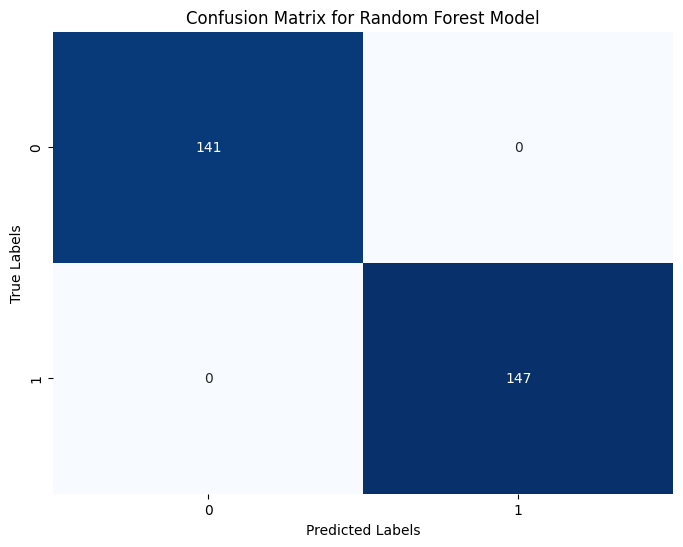

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Training accuracy
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy * 100}")
print(f"Validation Accuracy: {val_accuracy * 100}")

Training Accuracy: 100.0
Validation Accuracy: 100.0


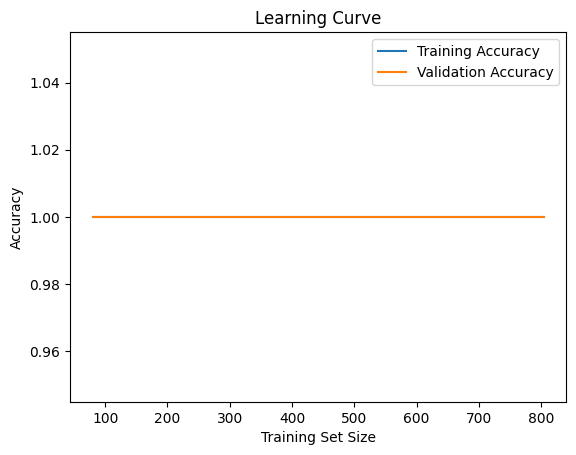

In [14]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Compute mean and standard deviation for train/validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example: Loading a CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/merged_data.csv')

# Assuming 'target' is your target column, and the rest are feature columns
X_train, X_test, y_train, y_test = train_test_split(df.drop('Recommendation', axis=1), df['Recommendation'], test_size=0.2, random_state=42)

# Save the test set to a CSV file
test_data = pd.concat([X_test, y_test], axis=1)  # Combine features and target for test set
test_data.to_csv('/content/sample_data/test_data.csv', index=False)

In [16]:
# Define a function to map maturity in days to age groups
def map_to_age_group(maturity_days):
    if maturity_days < 90:
        return "2.5"
    elif 90 <= maturity_days < 105:
        return "3"
    elif 105 <= maturity_days < 120:
        return "3.5"
    elif 120 <= maturity_days <= 135:
        return "4-4.5"
    elif maturity_days > 135:
        return "5-6"
    else:
        return None

# Apply the mapping function
combined_data['Age Group'] = combined_data['Maturity (days)'].apply(map_to_age_group)

In [17]:
def predict_suitable_varieties_for_district(province_name, district_name, district_data, varieties_data, model):
    # Filter the district data by the specified province and district
    district_conditions = district_data[
        (district_data['Province'] == province_name) &
        (district_data['District'] == district_name)
    ]

    if district_conditions.empty:
        raise ValueError(f"No data found for district '{district_name}' in province '{province_name}'.")

    # Extract the environmental conditions for prediction
    district_conditions = district_conditions.iloc[0]
    annual_temperature = le_temperature.transform([district_conditions['Annual Temperature']])[0]
    annual_rainfall = le_rainfall.transform([district_conditions['Annual Rainfall']])[0]

    # Prepare the prediction data
    prediction_data = varieties_data.copy()
    prediction_data['Annual Temperature'] = annual_temperature
    prediction_data['Annual Rainfall'] = annual_rainfall

    # Ensure 'Maturity (days)' is numeric
    prediction_data['Maturity (days)'] = prediction_data['Maturity (days)'].apply(convert_maturity_to_numeric)
    prediction_data.dropna(subset=['Maturity (days)'], inplace=True)

    # Add 'Age Group' if not already present
    if 'Age Group' not in prediction_data.columns:
        prediction_data['Age Group'] = prediction_data['Maturity (days)'].apply(map_to_age_group)

    # Prepare features for prediction
    X_pred = prediction_data[['Average Yield (t/ha)', 'Maturity (days)', 'Annual Temperature', 'Annual Rainfall']]

    # Predict suitability for each variety
    prediction_data['Suitability'] = model.predict(X_pred)

    # Filter suitable varieties
    suitable_varieties = prediction_data[prediction_data['Suitability'] == 1]

    return suitable_varieties[['Variety Name', 'Average Yield (t/ha)', 'Maturity (days)', 'Age Group',
                               'Gelatinization Temperature', 'Grain Shape']]


In [18]:
print("Unique Age Groups in Combined Data:")
print(combined_data['Age Group'].unique())

Unique Age Groups in Combined Data:
['4-4.5' '3.5' '5-6' '3' '2.5']


In [23]:
province_name = input("Enter the province name: ").strip()
district_name = input("Enter the district name: ").strip()
age_group = input("Enter the preferred age group (2.5, 3, 3.5, 4-4.5, 5-6): ").strip()

try:
    # Call the prediction function
    recommended_varieties = predict_suitable_varieties_for_district(province_name, district_name, district_data, varieties_data, rf_model)

    # Convert 'Age Group' column and user input to consistent format
    recommended_varieties['Age Group'] = recommended_varieties['Age Group'].astype(str)  # Ensure column is string
    age_group = str(age_group)  # Ensure user input is string

    # Debugging: Print unique age groups to confirm consistency
    print("\nUnique Age Groups in Predicted Varieties:")
    print(recommended_varieties['Age Group'].unique())

    # Filter the varieties based on the age group
    filtered_varieties = recommended_varieties[recommended_varieties['Age Group'] == age_group]

    # Debugging: Print filtered varieties
    print("\nFiltered Varieties (After Age Group Filtering):")
    print(filtered_varieties)

    # Display the results
    if not filtered_varieties.empty:
        print(f"\nRecommended Rice Varieties for {district_name} District in Age Group {age_group} months:")
        print(filtered_varieties)
    else:
        print(f"\nNo suitable rice varieties found for {district_name} District in Age Group {age_group} months.")

except ValueError as e:
    print(e)

Enter the province name: Western Province
Enter the district name: Colombo
Enter the preferred age group (2.5, 3, 3.5, 4-4.5, 5-6): 3

Unique Age Groups in Predicted Varieties:
['3' '4-4.5 ' '3.5' '5-6']

Filtered Varieties (After Age Group Filtering):
   Variety Name  Average Yield (t/ha)  Maturity (days) Age Group  \
7       Bg 34-6                   5.5            105.0         3   
8       Bg 34-8                   6.1             96.0         3   
16      Bg 94-2                   5.9            105.0         3   
20       Bg 310                   5.6             96.5         3   
27       At 313                   5.5             93.0         3   
56       At 308                   5.1             95.0         3   
65       At 303                   5.0             90.0         3   
66       Bg 305                   5.0             93.0         3   
84       Bg 301                   6.0             92.5         3   
85       Bg 301                   6.0             92.5         3   

In [30]:
province_name = input("Enter the province name: ").strip()
district_name = input("Enter the district name: ").strip()
age_group = input("Enter the preferred age group (2.5, 3, 3.5, 4-4.5, 5-6): ").strip()

try:
    # Call the prediction function
    recommended_varieties = predict_suitable_varieties_for_district(province_name, district_name, district_data, varieties_data, rf_model)

    # Convert 'Age Group' column and user input to consistent format
    recommended_varieties['Age Group'] = recommended_varieties['Age Group'].astype(str)  # Ensure column is string
    age_group = str(age_group)  # Ensure user input is string

    # Debugging: Print unique age groups to confirm consistency
    print("\nUnique Age Groups in Predicted Varieties:")
    print(recommended_varieties['Age Group'].unique())

    # Filter the varieties based on the age group
    filtered_varieties = recommended_varieties[recommended_varieties['Age Group'] == age_group]

    # Debugging: Print filtered varieties
    # print("\nFiltered Varieties (After Age Group Filtering):")
    # print(filtered_varieties)

    # Display the results
    if not filtered_varieties.empty:
        print(f"\nRecommended Rice Varieties for {district_name} District in Age Group {age_group} months:")
        print(filtered_varieties)
    else:
        print(f"\nNo suitable rice varieties found for {district_name} District in Age Group {age_group} months.")

except ValueError as e:
    print(e)

Enter the province name: Western Province
Enter the district name: Colombo
Enter the preferred age group (2.5, 3, 3.5, 4-4.5, 5-6): 3.5

Unique Age Groups in Predicted Varieties:
['3' '4-4.5 ' '3.5' '5-6']

Recommended Rice Varieties for Colombo District in Age Group 3.5 months:
   Variety Name  Average Yield (t/ha)  Maturity (days) Age Group  \
19       At 362                   6.0            110.0       3.5   
23       Bg 375                   5.4            107.0       3.5   
24       Ld 376                   5.0            110.0       3.5   
26       At 378                   5.8            101.0       3.5   
32       Bw 367                   5.2            106.5       3.5   
33       Bw 367                   5.2            106.5       3.5   
53       Bg 369                   5.5            104.0       3.5   
55       Bg 374                   5.8            106.5       3.5   
57       Bg 366                   6.0             99.5       3.5   
58       Bg 370                   5.4   